In [2]:
import pandas as pd
from scipy.spatial.distance import cdist
from plotting import plot_cities, plot_mtsp_cycles, plot_objective_function
from tsp import MTSP
from operations.mutation import SingleTravelerMut
from operations.crossover import SingleTravelerX
from operations.initialization import Initialization
from operations.selection import SelectIndividuals, STSPKElitism, FitnessProportional
from operations.fitness import MinSumFitnessCalculator, MinMaxFitnessCalculator, extract_routes
import logging
import matplotlib.pyplot as plt

logger = logging.getLogger("tsp_ga")

# >> setting up logging >>>>>
stream_handler = logging.StreamHandler()

logger.setLevel(logging.INFO)
logger.addHandler(stream_handler)
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [3]:
escolas = pd.read_csv("real/LatLongEscolasCageData.csv").dropna()

escolas_id = escolas[["idEscola"]].to_numpy().reshape(-1).tolist()
escolas_codigos = escolas[["Escola"]].to_numpy().reshape(-1).tolist()
coordenadas_escolas = escolas[["Latitude", "Longitude"]].to_numpy()

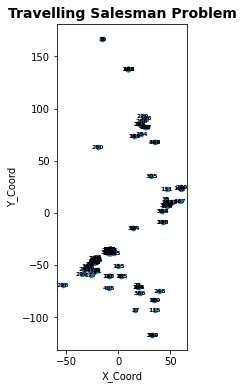

<Figure size 432x288 with 0 Axes>

In [4]:
plot_cities(coordenadas_escolas, escolas_id, len(escolas))

In [5]:
init = 0
traveler_breaks = []
for _ in range(6):
    init += 64
    traveler_breaks += [init]

traveler_breaks[-1] -= 1

print(traveler_breaks)

random_origin = 12 #np.random.randint(0, len(cidades))

distance_matrix = cdist(coordenadas_escolas, coordenadas_escolas, metric="euclidean")

mtsp = MTSP(n_gen=100, traveler_breaks=traveler_breaks)
pop_size = 200
mtsp.evolve(
    pop_initializer=Initialization(num_cidades=len(escolas_id), pop_size=pop_size, origin=random_origin),
    crossover_op=SingleTravelerX(crossover_type="order", probability=.8),
    mutation_op=SingleTravelerMut(mutation_type="inverse", probability=.8),
    selection_op=SelectIndividuals(),
    fitness_calculator=MinSumFitnessCalculator(distance_matrix),
    survivor_selection= FitnessProportional(pop_size=pop_size, num_cidades=len(escolas_id) - 1)#STSPKElitism()
)

routes = extract_routes(
            individual=mtsp.statistics["best_individual"][-1], 
            traveler_breaks=traveler_breaks,
            origin=random_origin)

[64, 128, 192, 256, 320, 383]


Generation 0, Best overall solution: 9921.893558194106
Generation 1, Best overall solution: 9921.893558194106
Generation 2, Best overall solution: 9921.893558194106
Generation 3, Best overall solution: 9921.893558194106
Generation 4, Best overall solution: 9921.893558194106
Generation 5, Best overall solution: 9921.893558194106
Generation 6, Best overall solution: 9921.893558194106
Generation 7, Best overall solution: 9921.893558194106
Generation 8, Best overall solution: 9921.893558194106
Generation 9, Best overall solution: 9921.893558194106
Generation 10, Best overall solution: 9921.893558194106
Generation 11, Best overall solution: 9921.893558194106
Generation 12, Best overall solution: 9921.893558194106
Generation 13, Best overall solution: 9921.893558194106
Generation 14, Best overall solution: 9921.893558194106
Generation 15, Best overall solution: 9921.893558194106
Generation 16, Best overall solution: 9921.893558194106
Generation 17, Best overall solution: 9921.893558194106
Ge

In [10]:
def plot_mtsp_cycles2(coordenadas_cidades, rotas, cidades_codigo, origin, filename: str = None):
    
    fig = plt.figure(figsize=(12,12), dpi=300)
    ax = fig.add_subplot(1, 1, 1, aspect=1)
    for i in range(len(cidades_codigo)):
        ax.text(coordenadas_cidades[i, 0], coordenadas_cidades[i, 1], cidades_codigo[i], fontsize=6, fontweight='bold', color='black', ha='center', va='center')
    
    plt.scatter(coordenadas_cidades[:, 0], coordenadas_cidades[:, 1], s=20, c=None)
    plt.scatter(coordenadas_cidades[origin, 0], coordenadas_cidades[origin, 1], marker="*", s=200, c="#ff0000")

    for traveler_idx, rt in enumerate(rotas):
        plt.plot(coordenadas_cidades[rt][:, 0], coordenadas_cidades[rt][:, 1], label=f"Traveler {traveler_idx}")
    plt.title("Multi Travelling Salesmen Problem Optimized", fontsize=14, fontweight='bold')
    plt.xlabel('X_Coord')
    plt.ylabel('Y_Coord')
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    plt.close()
    plt.clf()

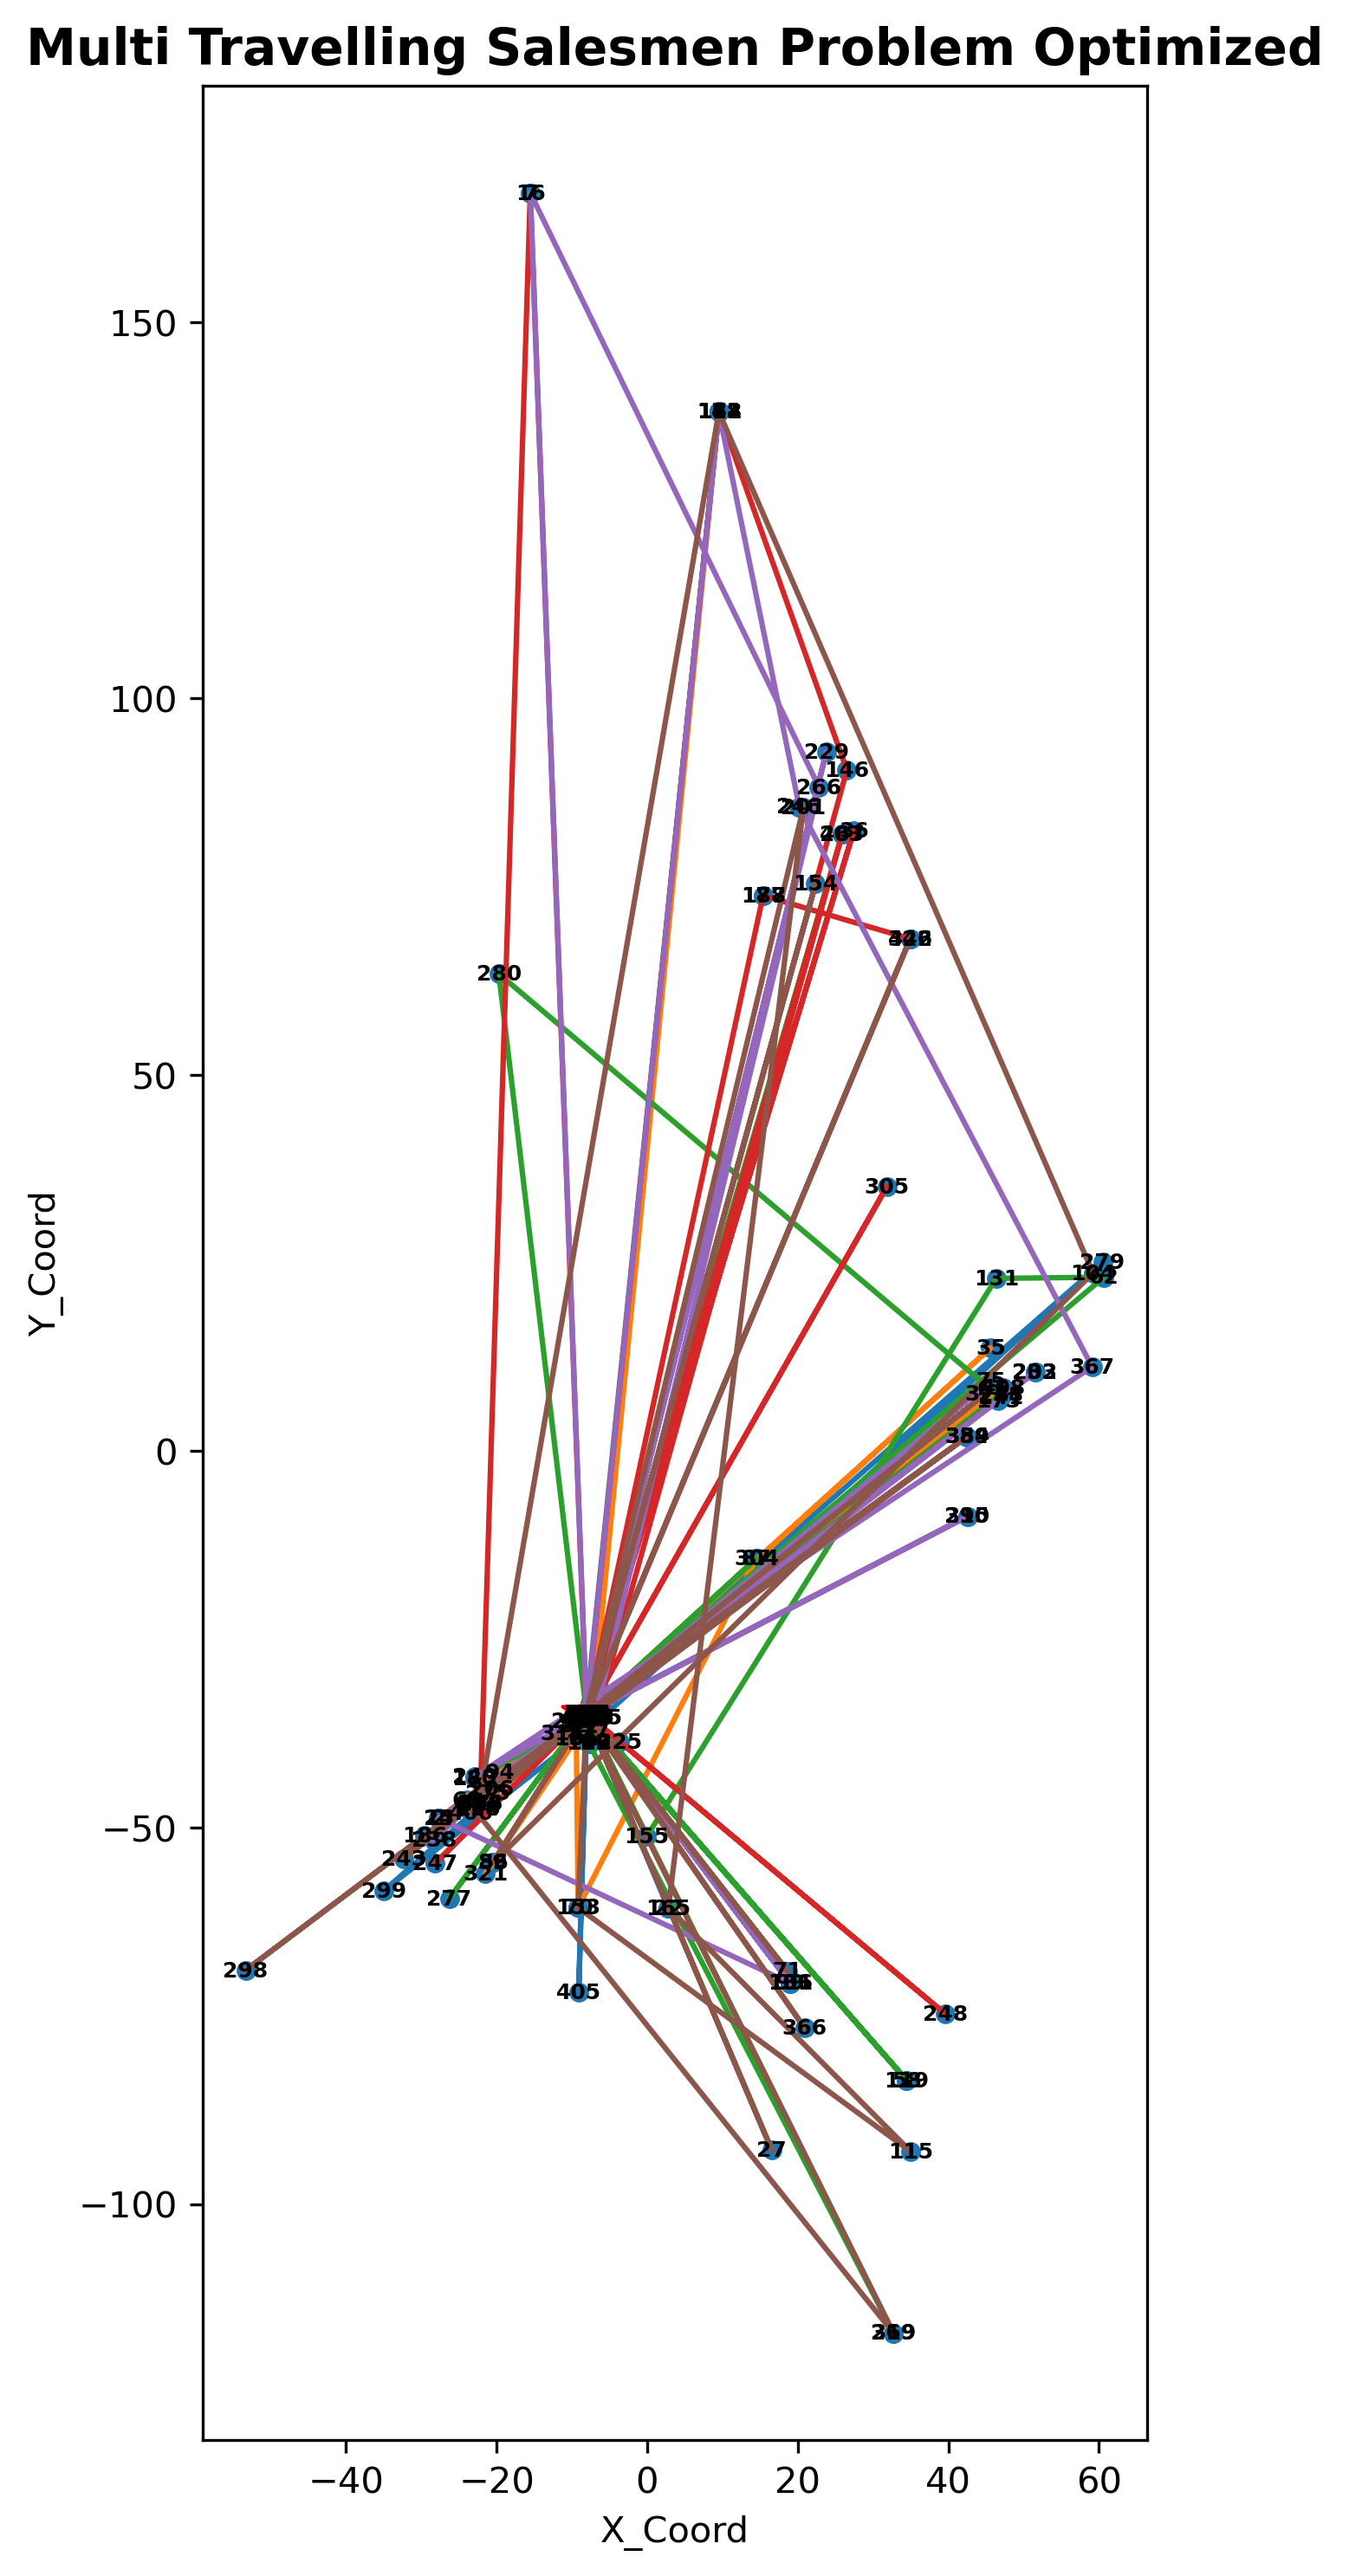

<Figure size 432x288 with 0 Axes>

In [11]:
plot_mtsp_cycles2(coordenadas_escolas, routes, escolas_id, random_origin)
